In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import os
from matplotlib import pyplot
sns.set()

In [2]:
#Dataset load
ds_train = pd.read_csv(r'/train.zip' , compression="zip")

## Dataset description

Data fields
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server -  Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

# Data exploration

In [3]:
ds_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
ds_train.shape

(1458644, 11)

Dataset dimentions: 1458644 row, 11 attributes

In [5]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
ds_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
#to_datetime columns
ds_train['pickup_datetime'] = pd.to_datetime(ds_train.pickup_datetime)
ds_train['dropoff_datetime'] = pd.to_datetime(ds_train.dropoff_datetime)
ds_train.loc[:, 'pickup_date'] = ds_train['pickup_datetime'].dt.date

In [8]:
#add columns to split datetimes
ds_train['month_pickup'] = [date.month for date in ds_train.pickup_datetime]
ds_train['day_pickup'] = [date.day for date in ds_train.pickup_datetime]
ds_train['dow_pickup'] = [date.dayofweek for date in ds_train.pickup_datetime]
ds_train['hour_pickup'] = [date.hour for date in ds_train.pickup_datetime]

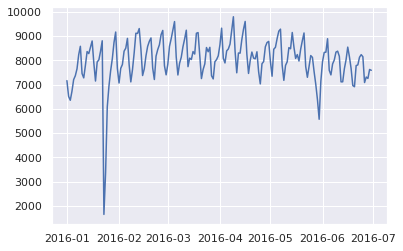

In [9]:
#time period in analysis
pyplot.plot(ds_train.groupby("pickup_date").count()[["vendor_id"]])

Time period: 6 month, from 01-2016 to 07-2016<br>
From this plot I can spot a deep decrease in the number of drives during late january

In [ ]:
#from sec to min trip_duration
ds_train['min_trip_duration'] = [sec//60 for sec in ds_train.trip_duration]

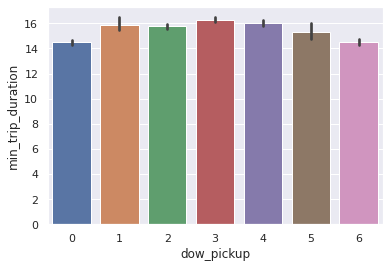

In [14]:
# bar plot of time duration in min
sns.barplot(data=ds_train, y="min_trip_duration", x="dow_pickup")

Trip duration changes based on day of the week <br>
Minor decrese during week end

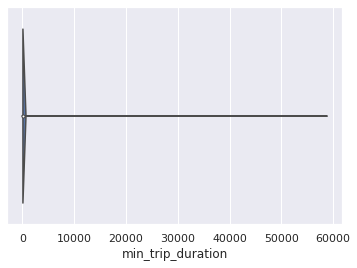

In [13]:
# violin plot of distribution time duration in min
sns.violinplot(x=ds_train["min_trip_duration"])

Outliers to remove

# Feature selection

# Feature extraction